<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du Cours TAL est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais.

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Rappels de Python: pour utiliser NLTK en Python, notamment dans un _notebook_ Jupyter, vous devez exécuter `import nltk`, ce qui vous permet d'accéder à toutes les commandes avec le préfixe `nltk`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements (faire `import nltk` puis `nltk.download()`).  Cela vous permettra de télécharger de nombreux corpus additionnels, mais que nous n'utiliserons pas dans ce laboratoire.

In [1]:
import nltk
import os
nltk.download('punkt_tab')
#from nltk.book import *

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**1a.** Écrivez une liste de mots (strings) que vous appelerez `sentence1`, formant une phrase en anglais.

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, triez les bi-grammes par ordre alphabétique et affichez le résultat.

In [2]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
sentence1 = ["this", "is", "a", "test", "sentence"]

print(len(sentence1))

bigrams = list(nltk.bigrams(sentence1))
sorted_bigrams = sorted(bigrams)

print(sorted_bigrams)


5
[('a', 'test'), ('is', 'a'), ('test', 'sentence'), ('this', 'is')]


**1b.** Définissez maintenant une chaîne unique appelée `string2` contenant une phrase, incluant par exemple des ponctuations.  

Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [3]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

string2 = "This is a test sentence, with some punctuation."

sentence2 = nltk.word_tokenize(string2)

print(sentence2)


['This', 'is', 'a', 'test', 'sentence', ',', 'with', 'some', 'punctuation', '.']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

**2a.** Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stockez son contenu dans une chaîne et affichez sa longueur.

In [4]:
from urllib import request
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

print(len(raw))


1135214


**2b.** En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder uniquement le texte principal du roman.  Vous pouvez utiliser la notation dite de *slicing* en Python, et essayer de localiser des chaînes qui indiquent où commence et finit le véritable texte. Quelle est la longueur de ce texte en caractères ?  

Si vous avez des problèmes avec les retours à la ligne, pensez à les remplacer avec la fonction `.replace(..., ...)`.  Si vous avez des problèmes d'encodage, voir le [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).

In [5]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text = raw[raw.find("PART I"):raw.rfind("*** END")]

text = text.replace("\n", " ")
print(len(text))

1130528


**2c.** Veuillez maintenant segmenter le texte en phrases avec NLTK, et afficher le nombre de phrases obtenues, ainsi qu'un court extrait de 4 phrases. 

Puis veuillez écrire les phrases dans un nouveau fichier, avec une phrase par ligne.

Comment appréciez-vous la qualité de la segmentation ?  Veuillez écrire votre appréciation dans une nouvelle cellule ci-dessous.

**Indications :**
* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`
* vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.sent_tokenize(...)` qui est documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize) (rappel : le nom "sentence tokenize" n'est pas très logique).

In [6]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
sentences = nltk.sent_tokenize(text)

print(len(sentences))
print(sentences[:4])

11903
['PART I    CHAPTER I  On an exceptionally hot evening early in July a young man came out of the garret in which he lodged in S. Place and walked slowly, as though in hesitation, towards K. bridge.', 'He had successfully avoided meeting his landlady on the staircase.', 'His garret was under the roof of a high, five-storied house and was more like a cupboard than a room.', 'The landlady who provided him with garret, dinners, and attendance, lived on the floor below, and every time he went out he was obliged to pass her kitchen, the door of which invariably stood open.']


In [7]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

# add sentences to file
for sentence in sentences:
    fd.write(sentence + "\n")

fd.close()


In [8]:
# Votre appréciation de la qualité ici :

# La segmentation est de bonne qualité, les phrases sont bien séparées et les caractères spéciaux ne posent pas de problème.
# Il y a des characters comme le _ pour représenter les mots qui sont en italique, mais cela ne pose pas de problème pour la segmentation.

**2d.** Veuillez maintenant segmenter chaque phrase du (2c) en tokens (mots et ponctuations).  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez le nombre total de _tokens_. Puis, affichez 4 phrases et commentez la qualité de la tokenisation.  Veuillez également créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  

Vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize)).

In [9]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

tokens = [nltk.word_tokenize(sentence) for sentence in sentences]

total_tokens = sum([len(sentence) for sentence in tokens])

print(total_tokens)
print(tokens[:4])

252755
[['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.'], ['He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase', '.'], ['His', 'garret', 'was', 'under', 'the', 'roof', 'of', 'a', 'high', ',', 'five-storied', 'house', 'and', 'was', 'more', 'like', 'a', 'cupboard', 'than', 'a', 'room', '.'], ['The', 'landlady', 'who', 'provided', 'him', 'with', 'garret', ',', 'dinners', ',', 'and', 'attendance', ',', 'lived', 'on', 'the', 'floor', 'below', ',', 'and', 'every', 'time', 'he', 'went', 'out', 'he', 'was', 'obliged', 'to', 'pass', 'her', 'kitchen', ',', 'the', 'door', 'of', 'which', 'invariably', 'stood', 'open', '.']]


In [10]:
# Votre appréciation de la qualité ici :

# La tokenisation est de bonne qualité, les mots et les ponctuations sont bien séparés.
# Les charactèrs spéciaux sont bien attaché aux mots correspondants. Par example les noms de rue K. reste attaché.

In [11]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

# add tokens to file
for sentence in tokens:
    fd.write(" ".join(sentence) + "\n")

fd.close()

**2e.** Veuillez maintenant tokeniser un texte sans le segmenter préalablement en phrases, en effectuant la tokenisation directement sur la chaîne de caractères contenant tout le texte.  Veuillez afficher un court extrait de 50 tokens. 

Veuillez afficher le nombre total de tokens : est-ce qu'il est identique au total obtenu au (2d) ?  

Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [12]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

tokens2 = nltk.word_tokenize(text)

print(len(tokens2))

print(tokens2[:50])

252755
['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase']


In [13]:
# Votre réponse à la question ici :

# Le nombre total de tokens est identique à celui obtenu au 2d (252755).

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  

Les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`.

Les objets `nltk.Text` peuvent en principe être créés avec : 
1. la chaîne de caractères constituant le texte (string)
2. la liste de tous les mots du texte (tableau de string)
3. la liste de toutes les phrases (tableau de listes de string)

**Seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`.**


**3a.** Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  Vous pouvez appeler ici de nouveau la fonction `nltk.word_tokenize` ou réutiliser le résultat du (2e).  Il n'y a rien à afficher ici.

In [14]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

text_nltk = nltk.Text(tokens2)


**3b.** Veuillez afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`.  Cette méthode est décrite au
 [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) qui montre aussi d'autres exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.

In [15]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

text_nltk.concordance("friend")


Displaying 25 of 44 matches:
x , as soon as I get it back from a friend ... ” he broke off in confusion . “
 He is a kind-hearted man and was a friend of your father ’ s too . But having
re lingering in conversation with a friend , who had just come up to them . Th
who had just come up to them . This friend was Lizaveta Ivanovna , or , as eve
him ; the student began telling his friend various details about Alyona Ivanov
is ! ” “ Poverty is not a vice , my friend , but we know you go off like powde
alised that he would be meeting his friend face to face . Now , in a flash , h
tudent and gentleman ; and he is my friend . And who are you ? ” “ I am the me
nd most effective means towards his friend ’ s recovery . Raskolnikov said not
on-in-law , and I say all this as a friend .... But I tell you what it is ; an
ion in its own way . Tolstyakov , a friend of mine , is always obliged to take
amped for room in a lodging with my friend Andrey Semyonovitch Lebeziatnikov ,
“ The explosive one ? ”

**3c.** Veuillez trouver les 10 mots qui ont les contextes les plus semblables à un mot de votre choix, en utilisant la méthode `similar`.  Cette méthode est aussi décrite au [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html).  Est-ce que les mots ayant des contextes semblables sont aussi semblables par le sens au mot choisi ?

In [16]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

text_nltk.similar("person")

way man house room heart girl crowd and door what town moment face
table corner lady pillow truth evening contrary


In [17]:
# Votre réponse à la question ici :

# Les mots ayant des contextes semblables ne sont pas forcément semblables par le sens au mot choisi.

**3d.** En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations (couples de mots) les plus fréquentes dans votre texte.

In [18]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

nltk.download('stopwords')
text_nltk.collocations()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Porfiry Petrovitch; Amalia Ivanovna; great deal; young man;
Nikodim Fomitch; Ilya Petrovitch; Andrey Semyonovitch; Hay Market;
Dmitri Prokofitch; Good heavens; police station; head clerk


**3e.** On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste de ses _types_) simplement en convertissant la liste des _tokens_ déjà obtenue dans une variable de type `set` en Python.  
* Veuillez obtenir ainsi le vocabulaire de votre texte.
* Combien de mots différents y a-t-il dans le vocabulaire, en incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [19]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

vocab = set(tokens2)

print(len(vocab))

sorted_vocab = sorted(vocab, key=len, reverse=True)

print(sorted_vocab[:20])

11011
['grey-and-rainbow-coloured', 'Schleswig-Holstein', 'frightened-looking', 'disproportionately', 'cross-examination', 'indistinguishable', 'Cough-cough-cough', 'well-proportioned', '_psychologically_', 'poverty-stricken', 'horrible-looking', 'circumstantially', 'half-broken-down', 'superciliousness', 'enthusiastically', 'waistcoat-pocket', 'sinister-looking', 'pawnbroker-woman', 'governor-general', '_Hof-kriegsrath_']


In [20]:
# Votre réponse à la question ici :

# Il y a 11011 mots différents dans le vocabulaire.

# ['grey-and-rainbow-coloured', 'Schleswig-Holstein', 'frightened-looking', 'disproportionately', 'indistinguishable', '_psychologically_', 'well-proportioned', 'Cough-cough-cough', 'cross-examination', 'delicate-looking', 'terrible-looking', 'evil-intentioned', 'sinister-looking', 'Governor-General', 'disproportionate', 'indiscriminately', 'governor-general', '_Hof-kriegsrath_', 'misunderstanding', 'straight-forward']

# Les mots les plus longs sont des mots composés ou des noms propres, il inclut aussi un mot en italique.

**3f.** Veuillez construire la distribution de fréquences de votre texte, en utilisant un objet `FreqDist`, et utilisez-là pour afficher les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

Indication : NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text` en les stockant dans un objet de type `FreqDist` (pour _frequency distribution_) comme expliqué dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de cet objet, on peut déterminer les mots les plus fréquents.

In [21]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

fdist = nltk.FreqDist(text_nltk)
most_common = fdist.most_common(70)

print([word for word, freq in most_common if len(word) > 4])

['Raskolnikov', 'there', 'would', 'about']


## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

**4a.** Veuillez afficher le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

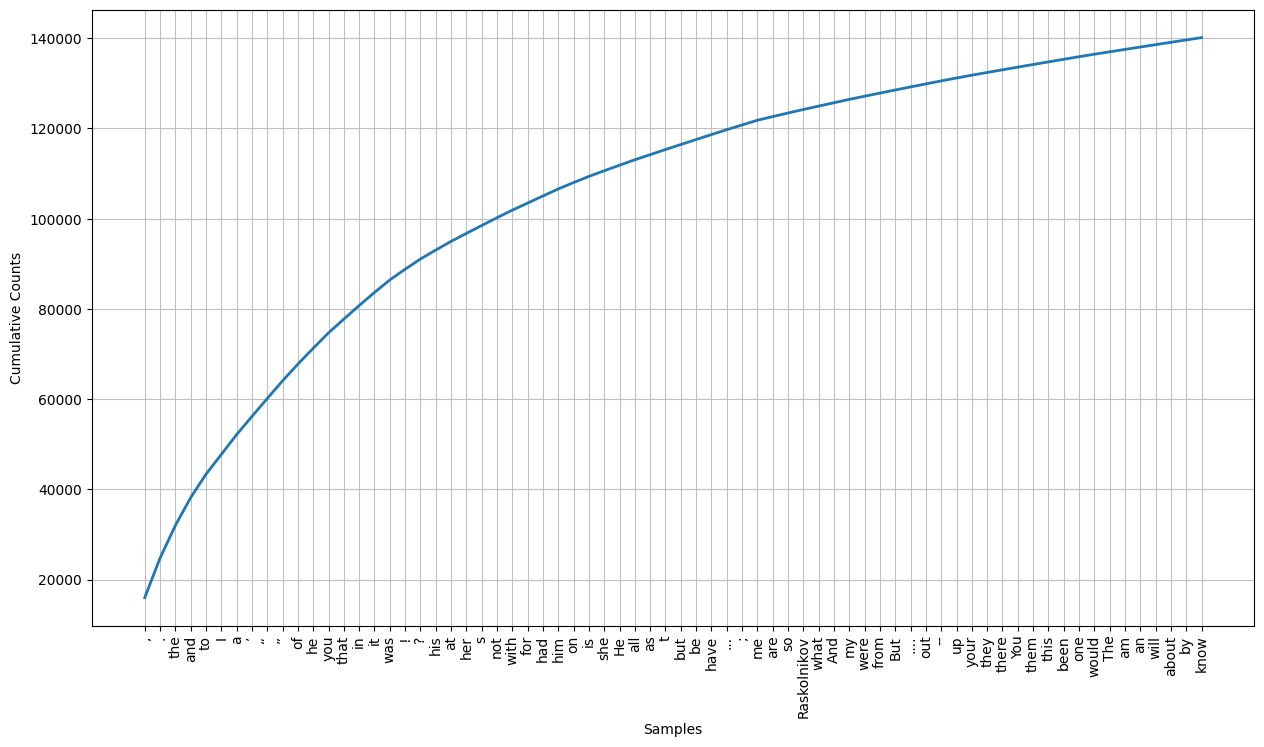

In [23]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
plt.figure(figsize=(15, 8))

fdist.plot(70, cumulative=True)


**4b.** Veuillez construir une liste avec la longueur de chaque _token_ du texte.  La liste aura donc autant de nombres que de tokens.  Veuillez créer un nouvel objet `FreqDist` à partir de cette liste de nombres, et affichez la distribution _non-cumulative_ des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

<Axes: xlabel='Samples', ylabel='Counts'>

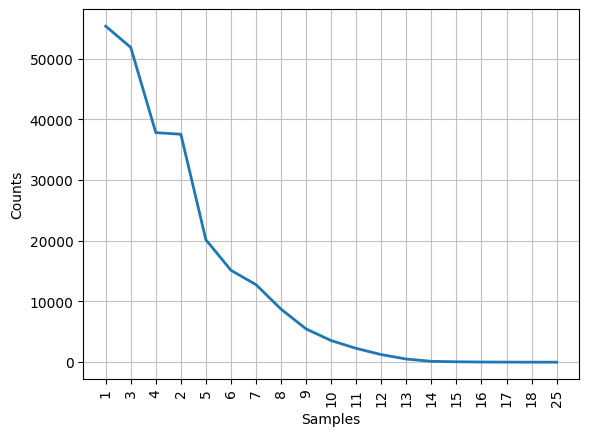

In [24]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

lengths = [len(token) for token in tokens2]

fdist_length = nltk.FreqDist(lengths)

fdist_length.plot()

In [25]:
# Vos réponses aux deux questions ici :
#  Quelle est la longueur la plus fréquente ?
# La longueur la plus fréquente est 1
#  Comment évolue la longueur en fonction de la fréquence ?
# La longueur diminue en fonction de la fréquence. Il y a quelques exceptions pour la longueur 2 qui est moins fréquente que la longueur 3 et 4.

**4c.** Veuillez générer la liste des fréquences des mots de votre texte par ordre décroissant (sans les mots, seulement les valeurs des fréquences).  Limitez cette liste à *N* valeurs (par exemple *N* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang, c'est-à-dire le rang (1, 2, 3, ..., **) sur l'axe *x* et la fréquence sur l'axe *y*.

Note : on génère directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

Ajoutez une deuxième courbe (dans la même commande `plot`) selon la formule *y* = *a* / (*x* + *b*) en choississant par essais successifs des valeurs de *a* et *b* qui vous rapprochent autant que possible de la courbe des fréquences.  Cette formule est appelée *Loi de Zipf* et illustre une propriété du vocabulaire d'un échantillon suffisamment grand de texte.

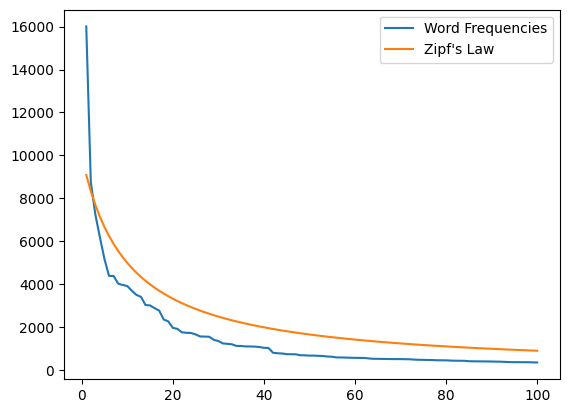

In [26]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.

freqs = [freq for word, freq in fdist.most_common(100)]

x_values = range(1, 101)
y_values = freqs

plt.plot(x_values, y_values, label='Word Frequencies')

a = 100000
b = 10

y_values_zipf = [a / (x + b) for x in x_values]

plt.plot(x_values, y_values_zipf, label='Zipf\'s Law')

plt.legend()


## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ en ajoutant vos deux noms.  Puis ajoutez-le dans une archive _zip_ avec le _notebook_ de la partie 1c, et soumettez l'archive sur Cyberlearn. 